In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing and cleaning data using pandas library
data = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/data.csv')

In [ ]:
# Observe the data
data
del(data['Unnamed: 32'])

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Convert the output labels to numbers : M->0; B-> 1

data.diagnosis = data.diagnosis.map({'M':0,'B':1})

In [ ]:
## We have left first two columns and taken other columns as input features
X = data.iloc[:, 2:].values
# 2nd column is the output label
y = data.iloc[:, 1].values

In [ ]:
X.shape

(569, 30)

In [ ]:
### Split data into train and test. Keep 10% of samples for testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10,random_state = 1)

In [ ]:
## Normalizing the Data
def findMeanStddev(X):
    mean=np.mean(X,axis=0)
    stddev=np.std(X,axis=0)
    return mean,stddev

def normalizeX(X, mean, stddev):
    Xn=processing.scale(X)
    return Xn
    


In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn import preprocessing
from tensorflow import  keras

mean,stddev=findMeanStddev(X)

X_train=preprocessing.scale(X_train)
Y_train=keras.utils.to_categorical(Y_train, num_classes=2)
X_test=preprocessing.scale(X_test)
Y_test=keras.utils.to_categorical(Y_test, num_classes=2)

input_layer = Input(shape = (X_train.shape[1:]))
hidden_layer_1 = Dense(30, activation = 'sigmoid')(input_layer)
hidden_layer_2 = Dense(20, activation = 'tanh')(hidden_layer_1)
output_layer = Dense(2, activation = 'softmax')(hidden_layer_2)

model = Model(inputs = [input_layer], outputs = [output_layer])

##compiling the model
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',  metrics = ['accuracy'])
model.summary()
print(X_train.shape)
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 100)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,592
Trainable params: 1,592
Non-trainable params: 0
_________________________________________________________________
(512, 30)
Epoch 1/100
15/15 [==============================] - 2s 37ms/step - loss: 0.5684 - accuracy: 0.7891 - val_loss: 0.5548 - val_accuracy: 0.7115
Epoch 2/100
15/15 [====================

In [ ]:
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(X_test,Y_test,verbose=0)  # Evaluate the model
print('Accuracy :%0.3f'%accuracy)

pred_labels = model.predict(X_test)
cm = confusion_matrix(Y_test.argmax(axis=1), pred_labels.argmax(axis=1))
print(cm )

Accuracy :0.982
[[22  1]
 [ 0 34]]


In [ ]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 18ms/step - loss: 0.0527 - accuracy: 0.9825


[0.05269110947847366, 0.9824561476707458]

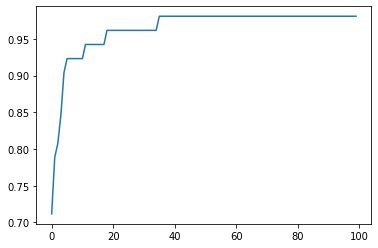

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])